# Exploratory Data Analysis and Data Cleaning

In [331]:
import numpy as np
import pandas as pd

In [332]:
df = pd.read_csv("../input/zos.csv")

In [333]:
df.head(3)

,id,booking_date,arrival_date,departure_date,reservation_type,room_type,source,txn_status,res_no,promo_code,folio_no,Room Charges,service_tax,luxury_tax,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
0,122675,2018-09-27 10:42:00+00,2018-09-29 10:41:59+00,2018-09-30 10:00:00+00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-1,NaN,215,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
1,122676,2018-09-27 10:42:04+00,2018-09-29 10:41:59+00,2018-09-30 10:00:00+00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-2,NaN,216,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
2,122677,2018-09-27 11:36:36+00,2018-10-01 19:40:31+00,2018-10-02 17:13:02+00,Confirm Booking,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-1,NaN,217,1833.2,0,0,0.0,89.85,Rs,Ms. Deshana Shah,1.001010e+68,Female,India,Driving License,1.03106E+50,11


In [334]:
df.shape

(60600, 24)

In [335]:
df.isnull().sum()
#reservation_type
#res_no
#promo_code
#guest_email
#guest_gender
#guest_country
#guest_id_type
#guest_country
#ID Number

id                           0
booking_date                 0
arrival_date                 0
departure_date               0
reservation_type          2253
room_type                    0
source                       1
txn_status                   0
res_no                    1990
promo_code               59721
folio_no                     0
Room Charges                 0
service_tax                  0
luxury_tax                   0
discount                     0
total_advance_deposit        0
pay_currency                 0
guest_name                   0
Guest_Email                771
guest_gender              7102
guest_country             2403
guest_id_type             9255
ID Number                 9113
hotel_id                     0
dtype: int64

In [336]:
#promo_code is having a huge number of null data so we are going to drop it 
df = df.drop('promo_code',axis=1)
df.head(1)

,id,booking_date,arrival_date,departure_date,reservation_type,room_type,source,txn_status,res_no,folio_no,Room Charges,service_tax,luxury_tax,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
0,122675,2018-09-27 10:42:00+00,2018-09-29 10:41:59+00,2018-09-30 10:00:00+00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-1,215,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11


In [337]:
df.columns

Index(['id', 'booking_date', 'arrival_date', 'departure_date',
       'reservation_type', 'room_type', 'source', 'txn_status', 'res_no',
       'folio_no', 'Room Charges', 'service_tax', 'luxury_tax', 'discount',
       'total_advance_deposit', 'pay_currency', 'guest_name', 'Guest_Email',
       'guest_gender', 'guest_country', 'guest_id_type', 'ID Number',
       'hotel_id'],
      dtype='object')

In [338]:
df.dtypes

id                         int64
booking_date              object
arrival_date              object
departure_date            object
reservation_type          object
room_type                 object
source                    object
txn_status                object
res_no                    object
folio_no                   int64
Room Charges             float64
service_tax                int64
luxury_tax                 int64
discount                 float64
total_advance_deposit    float64
pay_currency              object
guest_name                object
Guest_Email              float64
guest_gender              object
guest_country             object
guest_id_type             object
ID Number                 object
hotel_id                   int64
dtype: object

In [339]:
df.head(1)

,id,booking_date,arrival_date,departure_date,reservation_type,room_type,source,txn_status,res_no,folio_no,Room Charges,service_tax,luxury_tax,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
0,122675,2018-09-27 10:42:00+00,2018-09-29 10:41:59+00,2018-09-30 10:00:00+00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-1,215,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11


In [340]:
import datetime

df['booking_date'] = df['booking_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+%f'))
df['arrival_date'] = df['arrival_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+%f'))
df['departure_date'] = df['departure_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+%f'))


In [341]:
df.dtypes

id                                int64
booking_date             datetime64[ns]
arrival_date             datetime64[ns]
departure_date           datetime64[ns]
reservation_type                 object
room_type                        object
source                           object
txn_status                       object
res_no                           object
folio_no                          int64
Room Charges                    float64
service_tax                       int64
luxury_tax                        int64
discount                        float64
total_advance_deposit           float64
pay_currency                     object
guest_name                       object
Guest_Email                     float64
guest_gender                     object
guest_country                    object
guest_id_type                    object
ID Number                        object
hotel_id                          int64
dtype: object

In [342]:
df.head(10)

,id,booking_date,arrival_date,departure_date,reservation_type,room_type,source,txn_status,res_no,folio_no,Room Charges,service_tax,luxury_tax,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
0,122675,2018-09-27 10:42:00,2018-09-29 10:41:59,2018-09-30 10:00:00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-1,215,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
1,122676,2018-09-27 10:42:04,2018-09-29 10:41:59,2018-09-30 10:00:00,Confirm Booking,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-2,216,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
2,122677,2018-09-27 11:36:36,2018-10-01 19:40:31,2018-10-02 17:13:02,Confirm Booking,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-1,217,1833.2,0,0,0.0,89.85,Rs,Ms. Deshana Shah,1.001010e+68,Female,India,Driving License,1.03106E+50,11
3,122678,2018-09-27 11:36:37,2018-10-01 18:02:46,2018-10-02 17:08:41,Confirm Booking,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-2,218,1833.2,0,0,0.0,89.85,Rs,Ms. Dhrashti Brahmbhatt,1.001010e+68,Female,India,Driving License,1.03106E+50,11
4,122673,2018-09-27 09:01:42,2018-10-01 20:35:18,2018-10-02 14:21:19,Confirm Booking,12 Bed Mixed Dorm,Internet Booking Engine,Checked Out,ZO97,212,1683.2,0,0,0.0,67.35,Rs,Mr. Vinay N.S,1.181050e+56,Male,India,Driving License,7.5065E+43,11
5,122705,2018-09-28 22:05:16,2018-10-02 16:49:29,2018-10-03 13:00:11,Confirm Booking,Private Room,Booking.com,Checked Out,ZO114,248,3233.2,0,0,0.0,0.00,Rs,Mr. Dr. Ashikul Haq,1.001040e+86,Other,Bangladesh,Passport,1.181E+26,11
6,122718,2018-09-29 23:20:02,2018-09-30 15:33:26,2018-10-01 18:46:59,Confirm Booking,10 Bed Mixed Dorm,Booking.com,Checked Out,ZO122,264,1734.2,0,0,0.0,0.00,Rs,Mr. ganesh p,1.030970e+80,Male,India,Aadhar Card No.,5.20541E+34,11
7,122717,2018-09-29 21:21:57,2018-10-19 19:14:14,2018-10-21 19:08:41,Confirm Booking,10 Bed Mixed Dorm,HostelWorld,Checked Out,ZO121,263,2234.2,0,0,0.0,150.00,Rs,Mr. Naveen Rathee,1.100970e+80,Male,India,Aadhar Card No.,5.00551E+34,11
8,122716,2018-09-29 20:58:18,2018-09-29 20:55:00,2018-10-02 14:22:55,NaN,12 Bed Mixed Dorm,Walk In,Checked Out,NaN,262,2581.2,0,0,0.0,0.00,Rs,Mr. Syed Ahmed Omer,1.151210e+71,Male,India,Aadhar Card No.,1.16115E+47,11
9,122728,2018-09-30 12:02:04,2018-10-01 20:21:43,2018-10-02 14:08:31,Confirm Booking,10 Bed Mixed Dorm,Walk In,Checked Out,ZO130,277,1733.2,0,0,0.0,0.00,Rs,Mr. Maneesh Gondesi,1.090970e+62,Male,India,Aadhar Card No.,5.3053E+34,11


In [343]:
#reservation_type
#room_type
#source
#txn_status
#folio_no
#pay_currency
#guest_gender
#guest_country
#hotel_id
#id number


In [344]:
df[df['reservation_type']=='Confirm Booking'].shape

(58288, 23)

In [345]:
sum(df['reservation_type'].isnull())

2253

In [346]:
df.shape

(60600, 23)

In [347]:
df['reservation_type'] = df['reservation_type'].astype('category')

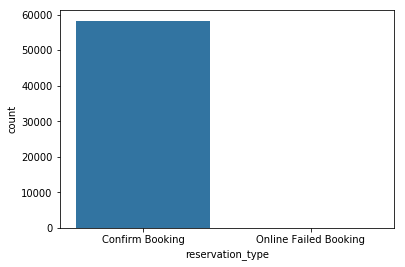

In [348]:
import seaborn as sns
sns.countplot(df['reservation_type'])

In [349]:
#this is very skew field so we can drop this
df = df.drop('reservation_type',axis=1)

In [350]:
df.head()

,id,booking_date,arrival_date,departure_date,room_type,source,txn_status,res_no,folio_no,Room Charges,service_tax,luxury_tax,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
0,122675,2018-09-27 10:42:00,2018-09-29 10:41:59,2018-09-30 10:00:00,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-1,215,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
1,122676,2018-09-27 10:42:04,2018-09-29 10:41:59,2018-09-30 10:00:00,6 Bed Mixed Dorm,HostelWorld,Cancel,ZO100-2,216,1234.2,0,0,0.0,82.35,Rs,Karthik P,1.070970e+65,NaN,India,NaN,NaN,11
2,122677,2018-09-27 11:36:36,2018-10-01 19:40:31,2018-10-02 17:13:02,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-1,217,1833.2,0,0,0.0,89.85,Rs,Ms. Deshana Shah,1.001010e+68,Female,India,Driving License,1.03106E+50,11
3,122678,2018-09-27 11:36:37,2018-10-01 18:02:46,2018-10-02 17:08:41,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-2,218,1833.2,0,0,0.0,89.85,Rs,Ms. Dhrashti Brahmbhatt,1.001010e+68,Female,India,Driving License,1.03106E+50,11
4,122673,2018-09-27 09:01:42,2018-10-01 20:35:18,2018-10-02 14:21:19,12 Bed Mixed Dorm,Internet Booking Engine,Checked Out,ZO97,212,1683.2,0,0,0.0,67.35,Rs,Mr. Vinay N.S,1.181050e+56,Male,India,Driving License,7.5065E+43,11


In [351]:
sum(df['room_type'].isnull())

0

In [352]:
df['room_type'].value_counts()

8 Bed Mixed Dorm                                            7870
6 Bed Mixed Dorm                                            7814
4 Bed Mixed Dorm                                            3702
Superior 8 Bed Mixed Dorm                                   3599
6 Bed Mixed Container Dorm                                  2574
Private Room                                                2319
Superior 6 Bed Mix                                          2250
Superior 6 Bed Mixed Dorm                                   2060
6 Bed Female Dorm                                           1890
10 Bed Mixed Dorm                                           1617
8-Bed Mixed Dorm- shared washroom                           1114
4 Bed Female Dorm                                           1083
Bed in 8 Bed Mixed Dorm                                     1019
Four Bed Dorm                                               1010
Standard Rooms                                               994
Deluxe Room              

In [353]:
# this field seems to be a categorical one thus converting to categorical one
df['room_type']=df['room_type'].astype('category')

In [354]:
df['source'].value_counts()


Internet Booking Engine    13563
Booking.com                12837
WEB                        10243
HostelWorld                 7038
Walk In                     4591
Walk-in                     3294
Agoda.com                   2539
Extended Stay               1707
HostelWorld XML             1201
Walk-In                      890
Zostel Reservations          580
Makemytrip                   529
Goibibo                      471
go-mmt                       211
Phone                        211
makemytrip                   191
HostelWorld.com              132
Expedia QuickConnectÂ®       117
Agoda                         78
Exotel                        49
Zostel Passport               27
AirBNB                        20
MakemytripXml                 17
Expedia                       16
Email                         13
Cross Selling                 12
Wandertrails                   6
Dorms.com                      3
Personal Reference             3
Cross selling                  2
AirBnB    

In [355]:
df['source'] = df['source'].astype('category')

In [356]:
df = df[~(df['source'].isnull()==True)]

In [357]:
df['source'].value_counts()


Internet Booking Engine    13563
Booking.com                12837
WEB                        10243
HostelWorld                 7038
Walk In                     4591
Walk-in                     3294
Agoda.com                   2539
Extended Stay               1707
HostelWorld XML             1201
Walk-In                      890
Zostel Reservations          580
Makemytrip                   529
Goibibo                      471
Phone                        211
go-mmt                       211
makemytrip                   191
HostelWorld.com              132
Expedia QuickConnectÂ®       117
Agoda                         78
Exotel                        49
Zostel Passport               27
AirBNB                        20
MakemytripXml                 17
Expedia                       16
Email                         13
Cross Selling                 12
Wandertrails                   6
Dorms.com                      3
Personal Reference             3
Cross selling                  2
Trivago   

In [358]:
df['txn_status'].value_counts()

Checked Out                50414
Cancel                      6757
No Show                     3207
Confirmed Reservation        162
Unconfirmed Reservation       59
Name: txn_status, dtype: int64

In [359]:
sum(df['txn_status'].isnull())

0

In [360]:
df['txn_status'] = df['txn_status'].astype('category')

In [361]:
df['res_no'].value_counts()

4             2
ZBG798-2      1
ZJ20298-2     1
ZP11764-5     1
ZK13267       1
ZK12110-3     1
ZGK11983-2    1
ZU9125-2      1
ZCM2481-4     1
ZD51085       1
ZM5754-3      1
ZK11405       1
ZGK11421      1
ZPC4057-1     1
ZMc2415-2     1
ZS2346-1      1
ZA17074-3     1
ZKO3889       1
ZC5018        1
ZD50288       1
ZAL1818-3     1
ZD49943       1
ZGK12973      1
ZD51621-2     1
ZD46866       1
ZO396         1
ZPO4034       1
ZU8108-4      1
ZK12246       1
ZR16848-1     1
             ..
ZJ18895       1
ZSR319        1
ZC5256-4      1
ZJ18777-5     1
ZO112-1       1
ZGK11883-1    1
ZGK11770-2    1
ZCM2357-6     1
ZJ20809       1
ZC4553        1
ZM6481-3      1
ZK12805       1
ZL3367-1      1
ZM5754-4      1
ZD51200       1
ZL3167        1
ZK12896       1
ZR17385       1
ZPC2360-4     1
ZGK12030-2    1
ZPC2249-1     1
ZV13406       1
ZJD831-4      1
ZM7722        1
ZU7916-3      1
ZBG568        1
ZM6139-2      1
ZP11544       1
ZA16232-2     1
ZU8496-2      1
Name: res_no, Length: 58

In [362]:
df = df[~(df['res_no'].isnull()==True)]

In [363]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
res_no_vector=cv.fit_transform(df['res_no'])

In [364]:
res_no_vector.shape

(58609, 39879)

In [365]:
sum(df['folio_no'].isnull())

0

In [366]:
sum(df['Room Charges'].isnull())

0

In [367]:
df['service_tax'].value_counts()
#thus we can drop service_tax column


0    58609
Name: service_tax, dtype: int64

In [368]:
df = df.drop('service_tax',axis=1)

In [369]:
df['luxury_tax'].value_counts()
#thus we can drop this column too

0    58609
Name: luxury_tax, dtype: int64

In [370]:
df = df.drop('luxury_tax',axis=1)

In [371]:
df['discount'].value_counts()

 0.00        58503
-112.35         15
-89.85          11
-799.60          7
-97.35           6
-67.80           4
-127.35          4
-134.85          3
-59.90           3
-149.80          3
-224.70          3
-219.60          3
-64.90           2
-109.80          2
-74.85           2
-194.70          2
-74.90           2
-249.90          2
-104.93          1
-780.00          1
-420.00          1
-164.70          1
-599.70          1
-179.70          1
-34.90           1
-439.20          1
-404.55          1
-1.00            1
-142.77          1
-107.82          1
-84.90           1
-149.85          1
-174.70          1
-699.80          1
-224.85          1
-13017.92        1
-441.00          1
-500.00          1
-64.91           1
-179.85          1
-549.50          1
-274.50          1
-610.00          1
-2694.00         1
-292.05          1
-50.00           1
-99.80           1
-299.70          1
-89.90           1
-374.85          1
Name: discount, dtype: int64

In [372]:
#thus it is a continuous column, Cheking nan values
sum(df['discount'].isnull())

0

In [373]:
df['total_advance_deposit'].value_counts()

0.00       16216
499.00      2233
449.00      1696
549.00      1631
599.00      1477
799.00       961
67.35        921
749.00       899
998.00       871
74.85        826
399.00       732
898.00       662
649.00       620
82.35        590
1098.00      581
699.00       546
134.70       500
1198.00      490
89.85        469
149.70       359
849.00       341
999.00       327
59.85        301
1498.00      275
1598.00      269
52.35        254
349.00       248
224.50       246
1678.88      245
2798.88      244
           ...  
3360.84        1
1119.28        1
6302.52        1
47.12          1
193.13         1
717.20         1
489.33         1
167.67         1
2560.86        1
6573.70        1
530.85         1
199.00         1
80.09          1
4063.34        1
1519.44        1
3199.00        1
3500.00        1
262.85         1
7262.34        1
3671.96        1
4499.10        1
214.83         1
3396.60        1
2471.40        1
2999.29        1
5250.00        1
2085.90        1
63.28         

In [374]:
#thus it is a continuous column, Checking nan values
sum(df['total_advance_deposit'].isnull())

0

In [375]:
df['pay_currency'].value_counts()

Rs     57134
INR     1475
Name: pay_currency, dtype: int64

In [376]:
sum(df['pay_currency'].isnull())

0

In [377]:
df['pay_currency'] = df['pay_currency'].astype('category')

In [378]:
sum(df['guest_gender'].isnull())

7102

In [379]:
df['guest_gender'] = df['guest_gender'].fillna(value = 'other')

In [380]:
sum(df['guest_country'].isnull())

2378

In [381]:
df['guest_country'] = df['guest_country'].fillna(value = 'other')

In [382]:
df['guest_id_type'].value_counts()

Passport             18480
Aadhar Card No.      13987
Driving License      10928
Voter ID              2057
Other                 1395
Aadhar Card            995
Aadhar card (UID)      824
Zostel Passport        697
Voter Id card          171
College ID              14
+91 8050001140           8
Akola                    6
UID                      5
Others                   5
9681089406               4
India                    3
PAN Card                 3
+91 9168773807           2
7304111397               2
PAN                      1
+91 9016972418           1
+91 9962311402           1
983463576                1
+91 9650346518           1
Name: guest_id_type, dtype: int64

In [383]:

#df[~((df['guest_id_type']=='+91 8050001140')|(df['guest_id_type']=='9681089406')|(df['guest_id_type']=='+91 9168773807'))|(df['guest_id_type']=='7304111397')|(df['guest_id_type']=='+91 9016972418')|(df['guest_id_type']=='+91 9962311402')|(df['guest_id_type']=='983463576')|(df['guest_id_type']=='+91 9650346518'))]]

In [384]:
df['ID Number'].value_counts()



45                                                                                                                                                                                                                                                                                   1833
7.7072E+43                                                                                                                                                                                                                                                                            988
46                                                                                                                                                                                                                                                                                    707
8.00651E+25                                                                                                                                               

In [385]:
sum(df['ID Number'].isnull())

8876

In [386]:
df = df[~df['ID Number'].isnull()==True]

In [387]:
df.head()

,id,booking_date,arrival_date,departure_date,room_type,source,txn_status,res_no,folio_no,Room Charges,discount,total_advance_deposit,pay_currency,guest_name,Guest_Email,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
2,122677,2018-09-27 11:36:36,2018-10-01 19:40:31,2018-10-02 17:13:02,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-1,217,1833.2,0.0,89.85,Rs,Ms. Deshana Shah,1.001010e+68,Female,India,Driving License,1.03106E+50,11
3,122678,2018-09-27 11:36:37,2018-10-01 18:02:46,2018-10-02 17:08:41,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-2,218,1833.2,0.0,89.85,Rs,Ms. Dhrashti Brahmbhatt,1.001010e+68,Female,India,Driving License,1.03106E+50,11
4,122673,2018-09-27 09:01:42,2018-10-01 20:35:18,2018-10-02 14:21:19,12 Bed Mixed Dorm,Internet Booking Engine,Checked Out,ZO97,212,1683.2,0.0,67.35,Rs,Mr. Vinay N.S,1.181050e+56,Male,India,Driving License,7.5065E+43,11
5,122705,2018-09-28 22:05:16,2018-10-02 16:49:29,2018-10-03 13:00:11,Private Room,Booking.com,Checked Out,ZO114,248,3233.2,0.0,0.00,Rs,Mr. Dr. Ashikul Haq,1.001040e+86,Other,Bangladesh,Passport,1.181E+26,11
6,122718,2018-09-29 23:20:02,2018-09-30 15:33:26,2018-10-01 18:46:59,10 Bed Mixed Dorm,Booking.com,Checked Out,ZO122,264,1734.2,0.0,0.00,Rs,Mr. ganesh p,1.030970e+80,Male,India,Aadhar Card No.,5.20541E+34,11


In [388]:
df = df.drop('Guest_Email',axis=1)

In [389]:
df['hotel_id'].value_counts()

1     4692
9     3999
18    3921
30    3203
8     2717
25    2632
26    2465
16    2324
12    2176
7     1908
31    1678
4     1568
2     1533
23    1526
32    1516
11    1397
14    1194
29    1185
21    1105
22    1009
17     985
13     975
24     951
19     816
27     741
34     654
33     480
20     340
28      32
15      10
5        1
Name: hotel_id, dtype: int64

In [390]:
df['hotel_id'] = df['hotel_id'].astype('category')

In [391]:
df.dtypes

id                                int64
booking_date             datetime64[ns]
arrival_date             datetime64[ns]
departure_date           datetime64[ns]
room_type                      category
source                         category
txn_status                     category
res_no                           object
folio_no                          int64
Room Charges                    float64
discount                        float64
total_advance_deposit           float64
pay_currency                   category
guest_name                       object
guest_gender                     object
guest_country                    object
guest_id_type                    object
ID Number                        object
hotel_id                       category
dtype: object

In [392]:
df['guest_gender'] = df['guest_gender'].astype('category')

In [393]:
df['guest_country'] = df['guest_country'].astype('category')

In [394]:
df.dtypes

id                                int64
booking_date             datetime64[ns]
arrival_date             datetime64[ns]
departure_date           datetime64[ns]
room_type                      category
source                         category
txn_status                     category
res_no                           object
folio_no                          int64
Room Charges                    float64
discount                        float64
total_advance_deposit           float64
pay_currency                   category
guest_name                       object
guest_gender                   category
guest_country                  category
guest_id_type                    object
ID Number                        object
hotel_id                       category
dtype: object

In [395]:
sum(df['res_no'].isnull())

0

In [396]:
df = df.dropna()

In [397]:
df.head()

,id,booking_date,arrival_date,departure_date,room_type,source,txn_status,res_no,folio_no,Room Charges,discount,total_advance_deposit,pay_currency,guest_name,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
2,122677,2018-09-27 11:36:36,2018-10-01 19:40:31,2018-10-02 17:13:02,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-1,217,1833.2,0.0,89.85,Rs,Ms. Deshana Shah,Female,India,Driving License,1.03106E+50,11
3,122678,2018-09-27 11:36:37,2018-10-01 18:02:46,2018-10-02 17:08:41,6 Bed Female Dorm,Internet Booking Engine,Checked Out,ZO101-2,218,1833.2,0.0,89.85,Rs,Ms. Dhrashti Brahmbhatt,Female,India,Driving License,1.03106E+50,11
4,122673,2018-09-27 09:01:42,2018-10-01 20:35:18,2018-10-02 14:21:19,12 Bed Mixed Dorm,Internet Booking Engine,Checked Out,ZO97,212,1683.2,0.0,67.35,Rs,Mr. Vinay N.S,Male,India,Driving License,7.5065E+43,11
5,122705,2018-09-28 22:05:16,2018-10-02 16:49:29,2018-10-03 13:00:11,Private Room,Booking.com,Checked Out,ZO114,248,3233.2,0.0,0.00,Rs,Mr. Dr. Ashikul Haq,Other,Bangladesh,Passport,1.181E+26,11
6,122718,2018-09-29 23:20:02,2018-09-30 15:33:26,2018-10-01 18:46:59,10 Bed Mixed Dorm,Booking.com,Checked Out,ZO122,264,1734.2,0.0,0.00,Rs,Mr. ganesh p,Male,India,Aadhar Card No.,5.20541E+34,11


# Now we got the clean data now we will do cohort analysis

In [398]:
# arranging columns by booking date

In [399]:
df = df.sort_values('booking_date')
df.head(1)

,id,booking_date,arrival_date,departure_date,room_type,source,txn_status,res_no,folio_no,Room Charges,discount,total_advance_deposit,pay_currency,guest_name,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
58318,226693,2017-10-13 13:48:45,2018-12-25 14:55:19,2018-12-27 13:15:01,Deluxe,Booking.com,Checked Out,ZJ11522,19793,4232.42,0.0,3358.02,Rs,Mrs. Simona Ardelean,Female,Malta,Passport,4.90491E+19,9


In [405]:
df.dtypes

id                                int64
booking_date             datetime64[ns]
arrival_date             datetime64[ns]
departure_date           datetime64[ns]
room_type                      category
source                         category
txn_status                     category
res_no                           object
folio_no                          int64
Room Charges                    float64
discount                        float64
total_advance_deposit           float64
pay_currency                   category
guest_name                       object
guest_gender                   category
guest_country                  category
guest_id_type                    object
ID Number                        object
hotel_id                       category
dtype: object

# Problem 3

In [433]:
s = pd.Series(df.arrival_date.map(lambda x: pd.datetime(2017, x.month, x.day)))

In [434]:
df.head(1)

,id,booking_date,arrival_date,departure_date,room_type,source,txn_status,res_no,folio_no,Room Charges,discount,total_advance_deposit,pay_currency,guest_name,guest_gender,guest_country,guest_id_type,ID Number,hotel_id
58318,226693,2017-10-13 13:48:45,2018-12-25 14:55:19,2018-12-27 13:15:01,Deluxe,Booking.com,Checked Out,ZJ11522,19793,4232.42,0.0,3358.02,Rs,Mrs. Simona Ardelean,Female,Malta,Passport,4.90491E+19,9


In [414]:
#mask = (s.dt.date > pd.datetime(2000,3,15).date()) &(s.dt.date < pd.datetime(2000,5,15).date())

In [416]:
#mask

In [419]:
dk = df[df['guest_id_type'] == 'Passport']

# Total discount by passport users according to given discount

In [448]:
dk['discounted_price'] = (dk['discount']*dk['Room Charges'])/100

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [450]:
sum(dk['discounted_price'])*(-1)

3825468.239652001

# total discount according to 10 % charges

In [451]:
dk['discounted_price'] = dk['Room Charges']/10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [452]:
sum(dk['discounted_price'])

4546410.605999988

# Total Number of passport bookings

In [423]:
dk.shape[0]

18480

# Total number of passport room nights

In [470]:
dk['room nights'] = dk['departure_date']-dk['arrival_date']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [476]:
dk['room nights'].head()

58318   1 days 22:19:42
21329   2 days 16:58:26
31742   1 days 02:19:54
211     2 days 08:53:40
15726   1 days 20:52:09
Name: room nights, dtype: timedelta64[ns]

In [478]:
sumh=summ=sums = 0
for k in dk['room nights']:
    sumh = sumh+k.hour
    summ = summ+k.minute
    sums = sums+k.second

AttributeError: 'Timedelta' object has no attribute 'hour'

In [498]:
sumd = 0
for i in dk['room nights']:
    sumd = sumd + i.days + i.seconds/(24*60*60)

In [500]:
sumd

31341.511099537198

# Total Number of days = approx 31341